<a href="https://colab.research.google.com/github/muskan0202/Recognizance/blob/main/Recognizance_PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
client_train=pd.read_csv('/content/drive/MyDrive/client_train.csv')

In [ ]:
client_test=pd.read_csv('/content/drive/MyDrive/client_test.csv')

In [ ]:
test_invoice=pd.read_csv('/content/drive/MyDrive/test_invoice.csv')

In [ ]:
train_invoice=pd.read_csv("/content/drive/MyDrive/train_invoice.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
client_train['target'].value_counts()

0.0    93796
1.0     5587
Name: target, dtype: int64

In [ ]:
client_train

,disrict,client_id,client_catg,region,creation_date,target
0,60.0,train_Client_0,11.0,101.0,31-12-1994,0.0
1,69.0,train_Client_1,11.0,107.0,29-05-2002,0.0
2,62.0,train_Client_10,11.0,301.0,13-03-1986,0.0
3,69.0,train_Client_100,11.0,105.0,11-07-1996,0.0
4,62.0,train_Client_1000,11.0,303.0,14-10-2014,0.0
...,...,...,...,...,...,...
99378,69.0,train_Client_67495,11.0,107.0,29-05-1998,0.0
99379,63.0,train_Client_67496,11.0,312.0,29-10-1997,1.0
99380,62.0,train_Client_67497,11.0,303.0,14-12-2015,0.0
99381,63.0,train_Client_67498,11.0,311.0,31-12-2004,0.0


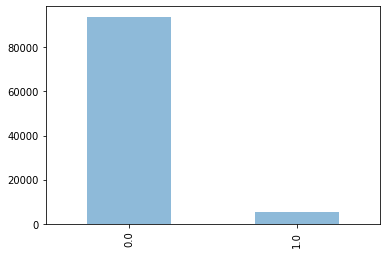

In [ ]:
client_train.target.value_counts().plot(kind='bar', alpha=0.5)

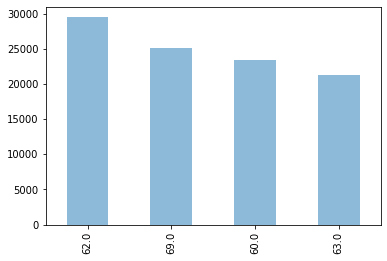

In [ ]:
client_train.disrict.value_counts().plot(kind='bar', alpha=0.5)

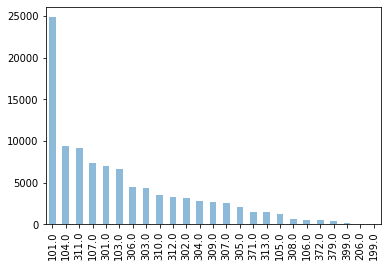

In [ ]:
client_train.region.value_counts().plot(kind='bar', alpha=0.5)

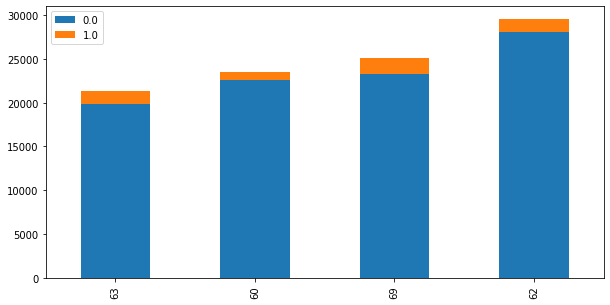

In [ ]:
a= client_train.target[client_train.disrict==63].value_counts()
b= client_train.target[client_train.disrict==60].value_counts()
c= client_train.target[client_train.disrict==69].value_counts()
d= client_train.target[client_train.disrict==62].value_counts()
df = pd.DataFrame([a,b,c,d])
df.index=[63,60,69,62]
df.plot(kind='bar',stacked=True, figsize=(10,5))

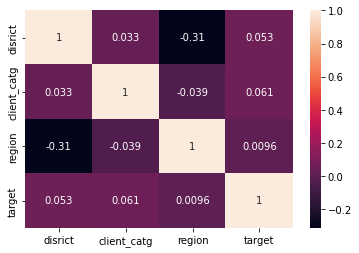

In [ ]:
ax = sns.heatmap(client_train.corr(), annot=True)

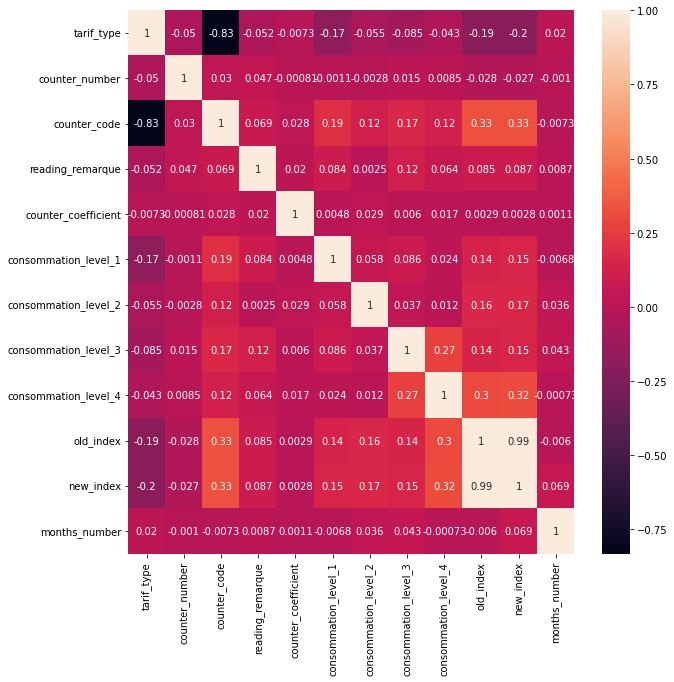

In [ ]:
fig= plt.subplots(figsize=(10,10))
ax = sns.heatmap(train_invoice.corr(), annot=True)

In [ ]:
from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [ ]:
target=client_train['target']
client_train = client_train.drop('target', axis=1)

In [ ]:
client_train.shape

(99383, 5)

In [ ]:
Counter(target)

Counter({0.0: 93796, 1.0: 5587})

In [ ]:
# ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
# newdata,newtarget = ros.fit_resample(client_train,target)
# print('Resampled dataset shape %s' % Counter(newtarget))

In [ ]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99383 entries, 0 to 99382
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   disrict        99383 non-null  float64
 1   client_id      99383 non-null  object 
 2   client_catg    99383 non-null  float64
 3   region         99383 non-null  float64
 4   creation_date  99383 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.8+ MB


In [ ]:
train_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279695 entries, 0 to 3279694
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 400.4+ MB


In [ ]:
np.unique(train_invoice['tarif_type'])

array([ 8,  9, 10, 11, 12, 13, 14, 15, 21, 27, 29, 30, 40, 42, 45])

In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('int')
    cl['disrict'] = cl['disrict'].astype('int')
    cl['region'] = cl['region'].astype('int')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['region_group']=cl['region'].map({100:0,200:1,300:2})
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])
    
    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,6218:5,69375:5,46:5,420:5})
    
    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(int)
    inv['delta_index'] = inv['new_index'] - inv['old_index']
    
    return cl, inv

In [ ]:
client_train1, invoice_train1 = feature_change(client_train, train_invoice)
client_test1, invoice_test1 = feature_change(client_test, test_invoice)

In [ ]:
def agg_feature(invoice, client_df, agg_stat):
    
    invoice['delta_time'] = invoice.sort_values(['client_id','invoice_date']).groupby('client_id')['invoice_date'].diff().dt.days.reset_index(drop=True)
    agg_trans = invoice.groupby('client_id')[agg_stat+['delta_time']].agg(['mean','std','min','max'])
    
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = invoice.groupby('client_id').size().reset_index(name='transactions_count')
    agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')
    
    weekday_avg = invoice.groupby('client_id')[['is_weekday']].agg(['mean'])
    weekday_avg.columns = ['_'.join(col).strip() for col in weekday_avg.columns.values]
    weekday_avg.reset_index(inplace=True)
    client_df = pd.merge(client_df, weekday_avg, on='client_id', how='left')
    
    full_df = pd.merge(client_df, agg_trans, on='client_id', how='left')
    
    full_df['invoice_per_cooperation'] = full_df['transactions_count'] / full_df['coop_time']
    
    return full_df

In [ ]:
agg_stat_columns = [
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type',
 'invoice_month',
 'invoice_year',
 'delta_index'
]

train_df1 = agg_feature(invoice_train1, client_train1, agg_stat_columns)
test_df1 = agg_feature(invoice_test1, client_test1, agg_stat_columns)

In [ ]:
test_df1

,disrict,client_id,client_catg,region,creation_date,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_std,months_number_min,months_number_max,counter_type_mean,counter_type_std,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,delta_index_mean,delta_index_std,delta_index_min,delta_index_max,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,invoice_per_cooperation
0,62,train_Client_675,11,301,2017-04-22,NaN,20,0.142857,7,11.000000,0.000000,11,11,2.165702e+12,0.000000e+00,2165702163000,2165702163000,0.000000,0.000000,0,0,207.000000,0.000000,207,207,9.000000,0.000000,9,9,452.285714,303.116982,2,771,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.000000,0.000000,0,0,909.857143,882.213774,0,2395,1362.142857,1118.049705,209,3166,3.857143,0.377964,3,4,1.000000,0.000000,1,1,7.428571,3.457222,3,11,2018.000000,0.816497,2017,2019,452.285714,303.116982,2,771,122.333333,53.177690,39.0,207.0,0.350000
1,63,train_Client_6750,11,313,2009-06-07,NaN,114,0.276596,47,21.489362,14.084948,11,40,1.711244e+06,2.161770e+06,101327,4552273,0.021277,0.145865,0,1,131.382979,96.166195,5,203,7.319149,1.446230,6,9,181.638298,146.618171,0,816,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.000000,0.000000,0,0,2199.063830,2175.846106,0,6609,2380.702128,2260.472228,0,7425,4.042553,0.657976,2,8,0.638298,0.485688,0,1,4.957447,2.553407,1,11,2014.744681,2.832023,2009,2019,181.638298,146.618171,0,816,77.913043,91.443444,0.0,302.0,0.412281
2,62,train_Client_67500,11,301,1982-12-24,NaN,432,0.029412,68,25.000000,15.111526,10,40,1.720494e+05,1.084194e+05,2654,299358,0.000000,0.000000,0,0,103.500000,99.232352,5,202,6.720588,1.034417,6,9,238.147059,218.583791,23,1346,153.102941,217.476102,0,950,0.000000,0.00000,0,0,0.000000,0.000000,0,0,12716.470588,12561.380567,0,35699,13107.720588,12745.197555,376,36496,4.470588,1.864600,2,12,0.500000,0.503718,0,1,8.264706,3.432147,2,12,2011.147059,3.817730,2005,2019,391.250000,288.477960,23,1346,72.701493,91.065414,0.0,364.0,0.157407
3,60,train_Client_67501,11,101,2009-04-24,NaN,116,0.000000,17,11.000000,0.000000,11,11,1.292196e+06,0.000000e+00,1292196,1292196,0.058824,0.242536,0,1,203.000000,0.000000,203,203,8.058824,1.088037,6,9,807.647059,733.454833,124,2400,49.764706,129.710991,0,400,47.058824,194.02850,0,800,19.705882,81.249434,0,335,5306.117647,5172.674162,0,15106,6230.294118,5554.794571,124,15711,6.941176,4.478708,2,20,1.000000,0.000000,1,1,4.882353,3.497899,1,11,2013.294118,3.157624,2009,2019,924.176471,868.996493,124,2784,220.812500,142.091153,116.0,655.0,0.146552
4,62,train_Client_67502,11,310,1992-12-15,NaN,312,0.166667,48,17.645833,12.317587,11,40,1.903188e+06,1.410924e+06,1141938,4463758,0.000000,0.000000,0,0,157.625000,84.099390,5,203,7.687500,1.460927,6,9,936.479167,381.687183,306,2114,327.187500,645.243271,0,3044,175.833333,425.94862,0,1600,291.729167,854.229346,0,3369,38372.895833,27542.067145,0,96078,40104.125000,28547.460881,1962,98353,4.583333,1.426696,4,8,0.770833,0.424744,0,1,

In [ ]:
def drop(df):
    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        df.drop([col], axis=1, inplace=True)
    return df

In [ ]:
train_df = drop(train_df1)
test_df = drop(test_df1)

In [ ]:
train_df

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_std,months_number_min,months_number_max,counter_type_mean,counter_type_std,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,delta_index_mean,delta_index_std,delta_index_min,delta_index_max,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,invoice_per_cooperation
0,60,11,101,NaN,288,0.028571,35,11.000000,0.000000,11,11,1.335667e+06,0.000000e+00,1335667,1335667,0.000000,0.000000,0.0,0.0,203.685714,1.529541,203,207,6.971429,1.248192,6,9,352.400000,310.343472,38,1200,10.571429,43.568935,0,186,0.000000,0.000000,0,0,0.000000,0.000000,0,0,9444.542857,4527.744415,3685,16493,9807.514286,4579.666655,3809,17078,4.628571,2.101620,2,12,1.000000,0.000000,1,1,6.685714,3.587326,1,12,2011.142857,3.695330,2005,2019,362.971429,341.553930,38,1386,144.147059,87.601070,40.0,508.0,0.121528
1,69,11,107,NaN,199,0.054054,37,11.000000,0.000000,11,11,6.789020e+05,0.000000e+00,678902,678902,0.000000,0.000000,0.0,0.0,203.000000,0.000000,203,203,7.216216,1.377097,6,9,557.540541,197.935960,190,1207,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,14330.756757,6124.126094,4110,23940,14888.297297,6119.723768,4661,25022,4.324324,1.375461,2,8,1.000000,0.000000,1,1,5.135135,3.128384,1,10,2011.837838,4.058691,2005,2019,557.540541,197.935960,190,1207,136.472222,92.492312,4.0,372.0,0.185930
2,62,11,301,NaN,393,0.055556,18,11.000000,0.000000,11,11,5.727650e+05,0.000000e+00,572765,572765,0.000000,0.000000,0.0,0.0,203.222222,0.942809,203,207,7.055556,1.258955,6,9,798.611111,513.841374,188,2400,37.888889,160.748942,0,682,0.000000,0.000000,0,0,0.000000,0.000000,0,0,32873.000000,5317.180865,25515,41532,33709.500000,5543.230331,25974,44614,6.444444,3.399346,4,12,1.000000,0.000000,1,1,6.611111,3.292396,2,11,2010.944444,4.249183,2005,2019,836.500000,646.808386,188,3082,289.470588,250.701794,20.0,738.0,0.045802
3,69,11,105,NaN,265,0.050000,20,11.000000,0.000000,11,11,2.078000e+03,0.000000e+00,2078,2078,0.000000,0.000000,0.0,0.0,413.000000,0.000000,413,413,6.150000,0.670820,6,9,1.200000,3.607011,0,15,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,94.150000,4.120232,90,99,95.350000,5.940716,90,114,4.200000,0.615587,4,6,1.000000,0.000000,1,1,5.550000,3.203206,1,10,2008.600000,2.137387,2005,2012,1.200000,3.607011,0,15,140.210526,95.569974,4.0,442.0,0.075472
4,62,11,303,NaN,50,0.285714,14,11.000000,0.000000,11,11,1.957500e+04,0.000000e+00,19575,19575,0.000000,0.000000,0.0,0.0,207.000000,0.000000,207,207,8.857143,0.363137,8,9,663.714286,224.831365,124,800,104.857143,167.155320,0,400,117.357143,289.433294,0,800,36.714286,105.421081,0,382,6900.428571,4732.111217,0,13337,7823.071429,4548.668807,959,13729,3.714286,0.726273,2,4,1.000000,0.000000,1,1,7.571429,3.390355,2,12,2016.857143,1.406422,2015,2019,922.642857,633.485669,124,2382,121.923077,80.057752,4.0,301.0,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
train_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

,disrict,client_catg,region,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_min,tarif_type_max,counter_number_mean,counter_number_min,counter_number_max,counter_code_mean,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_min,reading_remarque_max,consommation_level_1_mean,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_min,old_index_max,new_index_mean,new_index_min,new_index_max,months_number_mean,months_number_min,months_number_max,counter_type_mean,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_min,invoice_year_max,delta_index_mean,delta_index_min,delta_index_max,invoice_per_cooperation
0,60,11,101,288,0.028571,35,11.000000,11,11,1.335667e+06,1335667,1335667,203.685714,203,207,6.971429,6,9,352.400000,38,1200,10.571429,0,186,0.000000,0,0,0.000000,0,0,9444.542857,3685,16493,9807.514286,3809,17078,4.628571,2,12,1.000000,1,1,6.685714,1,12,2011.142857,2005,2019,362.971429,38,1386,0.121528
1,69,11,107,199,0.054054,37,11.000000,11,11,6.789020e+05,678902,678902,203.000000,203,203,7.216216,6,9,557.540541,190,1207,0.000000,0,0,0.000000,0,0,0.000000,0,0,14330.756757,4110,23940,14888.297297,4661,25022,4.324324,2,8,1.000000,1,1,5.135135,1,10,2011.837838,2005,2019,557.540541,190,1207,0.185930
2,62,11,301,393,0.055556,18,11.000000,11,11,5.727650e+05,572765,572765,203.222222,203,207,7.055556,6,9,798.611111,188,2400,37.888889,0,682,0.000000,0,0,0.000000,0,0,32873.000000,25515,41532,33709.500000,25974,44614,6.444444,4,12,1.000000,1,1,6.611111,2,11,2010.944444,2005,2019,836.500000,188,3082,0.045802
3,69,11,105,265,0.050000,20,11.000000,11,11,2.078000e+03,2078,2078,413.000000,413,413,6.150000,6,9,1.200000,0,15,0.000000,0,0,0.000000,0,0,0.000000,0,0,94.150000,90,99,95.350000,90,114,4.200000,4,6,1.000000,1,1,5.550000,1,10,2008.600000,2005,2012,1.200000,0,15,0.075472
4,62,11,303,50,0.285714,14,11.000000,11,11,1.957500e+04,19575,19575,207.000000,207,207,8.857143,8,9,663.714286,124,800,104.857143,0,400,117.357143,0,800,36.714286,0,382,6900.428571,0,13337,7823.071429,959,13729,3.714286,2,4,1.000000,1,1,7.571429,2,12,2016.857143,2015,2019,922.642857,124,2382,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99378,69,11,107,247,0.036364,55,23.127273,11,40,3.072829e+06,253485,6995398,120.200000,5,203,6.872727,6,9,697.781818,0,4000,77.400000,0,1816,8.236364,0,295,0.000000,0,0,18405.654545,0,49645,19189.072727,0,53237,4.654545,2,20,0.581818,0,1,6.890909,2,12,2012.181818,2005,2019,783.418182,0,5816,0.222672
99379,63,11,312,254,0.025641,39,11.000000,11,11,1.130500e+04,11305,11305,413.358974,413,420,6.282051,6,9,161.692308,45,370,0.000000,0,0,0.000000,0,0,0.000000,0,0,7677.179487,4075,10335,7838.871795,4389,10591,4.102564,2,8,1.000000,1,1,6.435897,1,11,2012.025641,2005,2019,161.692308,45,370,0.153543
99380,62,11,303,36,0.333333,18,25.000000,10,40,7.434654e+06,6894512,7974796,103.500000,5,202,8.277778,6,9,509.277778,18,1600,35.166667,0,295,0.000000,0,0,0.000000,0,0,32992.444444,2136,67412,33536.888889,2154,68099,4.666667,2,8,0.500000,0,1,7.777778,2,12,2017.444444,2016,2019,544.444444,18,1870,0.500000
99381,63,11,311,168,0.190476,21,17.904762,11,40,7.047596e+05,0,924997,155.857143,5,203,6.142857,6,9,319.571429,0,1213,0.000000,0,0,0.000000,0,0,0.000000,0,0,2671.095238,0,6917,2990.666667,0,8130,4.380952,4,8,0.761905,0,1,6.809524,1,10,2008.809524,2005,2011,319.571429,0,1213,0.125000


In [ ]:
test_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

,disrict,client_catg,region,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_min,tarif_type_max,counter_number_mean,counter_number_min,counter_number_max,counter_statue_mean,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_min,reading_remarque_max,consommation_level_1_mean,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_min,old_index_max,new_index_mean,new_index_min,new_index_max,months_number_mean,months_number_min,months_number_max,counter_type_mean,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_min,invoice_year_max,delta_index_mean,delta_index_min,delta_index_max,invoice_per_cooperation
0,62,11,301,20,0.142857,7,11.000000,11,11,2.165702e+12,2165702163000,2165702163000,0.000000,0,0,207.000000,207,207,9.000000,9,9,452.285714,2,771,0.000000,0,0,0.000000,0,0,0.000000,0,0,909.857143,0,2395,1362.142857,209,3166,3.857143,3,4,1.000000,1,1,7.428571,3,11,2018.000000,2017,2019,452.285714,2,771,0.350000
1,63,11,313,114,0.276596,47,21.489362,11,40,1.711244e+06,101327,4552273,0.021277,0,1,131.382979,5,203,7.319149,6,9,181.638298,0,816,0.000000,0,0,0.000000,0,0,0.000000,0,0,2199.063830,0,6609,2380.702128,0,7425,4.042553,2,8,0.638298,0,1,4.957447,1,11,2014.744681,2009,2019,181.638298,0,816,0.412281
2,62,11,301,432,0.029412,68,25.000000,10,40,1.720494e+05,2654,299358,0.000000,0,0,103.500000,5,202,6.720588,6,9,238.147059,23,1346,153.102941,0,950,0.000000,0,0,0.000000,0,0,12716.470588,0,35699,13107.720588,376,36496,4.470588,2,12,0.500000,0,1,8.264706,2,12,2011.147059,2005,2019,391.250000,23,1346,0.157407
3,60,11,101,116,0.000000,17,11.000000,11,11,1.292196e+06,1292196,1292196,0.058824,0,1,203.000000,203,203,8.058824,6,9,807.647059,124,2400,49.764706,0,400,47.058824,0,800,19.705882,0,335,5306.117647,0,15106,6230.294118,124,15711,6.941176,2,20,1.000000,1,1,4.882353,1,11,2013.294118,2009,2019,924.176471,124,2784,0.146552
4,62,11,310,312,0.166667,48,17.645833,11,40,1.903188e+06,1141938,4463758,0.000000,0,0,157.625000,5,203,7.687500,6,9,936.479167,306,2114,327.187500,0,3044,175.833333,0,1600,291.729167,0,3369,38372.895833,0,96078,40104.125000,1962,98353,4.583333,4,8,0.770833,0,1,4.270833,1,10,2013.020833,2005,2019,1731.229167,306,6891,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36105,62,11,304,173,0.014085,71,24.887324,11,40,5.423355e+05,156063,897286,0.070423,0,5,110.267606,5,207,6.000000,6,6,1.957746,0,139,0.000000,0,0,0.000000,0,0,0.000000,0,0,7.295775,0,14,7.295775,0,14,4.225352,2,8,0.521127,0,1,6.042254,2,10,2012.563380,2005,2019,0.000000,0,0,0.410405
36106,63,11,311,74,0.000000,41,25.853659,11,40,1.837554e+06,0,4811719,0.268293,0,5,103.536585,5,207,8.487805,6,9,185.853659,0,800,0.756098,0,31,0.000000,0,0,0.000000,0,0,1216.780488,0,5860,1403.390244,0,6225,3.902439,2,4,0.487805,0,1,6.048780,2,10,2015.829268,2013,2019,186.609756,0,831,0.554054
36107,63,11,311,85,0.194444,36,22.277778,11,40,1.602303e+05,0,262195,0.000000,0,0,128.444444,5,207,9.000000,9,9,273.083333,33,1075,0.000000,0,0,0.000000,0,0,0.000000,0,0,2533.388889,0,8505,2806.472222,94,9083,4.111111,4,8,0.611111,0,1,6.888889,2,12,2014.694444,2012,2019,273.083333,33,1075,0.423529
36108,60,11,101,300,0.000000,2,10.000000,10,10,1.253571e+06,1253571,1253571,0.000000,0,0,202.000000,202,202,7.500000,6,9,300.000000,200,400,70.500000,6,135,0.000000,0,0,0.000000,0,0,3464.500000,3197,3732,3835.000000,3732,3938,6.000000,4,8,1.000000,1,1,10.000000,8,12,2005.000000,2005,2005,370.500000,206,5

In [ ]:
y = target
X = train_df

feature_name = X.columns.tolist()

In [ ]:
# drop_col=['reading_remarque_max','counter_statue_min','counter_type_min','counter_type_max',
#           'tarif_type_max', 'delta_index_min', 'consommation_level_4_mean']

# X = X.drop(drop_col, axis=1)
# test_df = test_df.drop(drop_col, axis=1)

In [ ]:
#X =X[~X.isin([np.nan, np.inf, -np.inf]).any(1),axis=1]
#test_df =test_df[~test_df.isin([np.nan, np.inf, -np.inf]).any(1),axis=1]
#X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
#test_df[test_df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X=X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
test_df=test_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
# drop_col=['consommation_level_1_mean','consommation_level_2_mean','consommation_level_3_mean']

# X = X.drop(drop_col, axis=1)
# test_df = test_df.drop(drop_col, axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier
import lightgbm
classifiers = [    
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    RandomForestClassifier(n_estimators=100, max_features=3,criterion='entropy')
    #lightgbm.LGBMClassifier()
    ]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

In [ ]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0]])
# get_ipython().run_line_magic('matplotlib', 'inline')
# sns.set_color_codes("muted")
# ax=plt.subplots(figsize=(200,40))
# ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
# ax.set_xlabel('Accuracy',fontsize=20)
# plt.ylabel('Classifier',fontsize=20)
# plt.grid(color='r', linestyle='-', linewidth=0.5)
# plt.title('Classifier Accuracy',fontsize=20)

,Classifier,Accuracy
0,RandomForestClassifier,9.459936


In [ ]:
log

,Classifier,Accuracy
0,RandomForestClassifier,9.459936


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[50,100,500,1000],
            
             "max_features":['sqrt','log2'],}
 
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)

In [ ]:
col_drop = ['counter_statue_mean', 'counter_statue_max','counter_statue_min']
for col in col_drop:
    test_df.drop([col], axis=1, inplace=True)


In [ ]:
# clfr=RandomForestClassifier(criterion='entropy')
# clfr.fit(X,y)
# p=clfr.predict(test_df)

In [ ]:
clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
p=clf.predict(test_df)

In [ ]:
one=0
zero=0
for i in p:
  if(i==0):
    zero+=1
  else:
    one+=1
print(zero,one)

In [ ]:
# clf=RandomForestClassifier(n_estimators=100,max_features='log2')
# clf.fit(X,y)
# print(clf.score(X,y))
pred=clf.predict(test_df)

In [ ]:
print(clf.score(X,y))

0.9837195496211626


In [ ]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
sample_submission=pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
        "client_id": sample_submission["client_id"],
        "target": pred   })
submission.to_csv('submissionlast.csv', index=False)
